<a href="https://colab.research.google.com/github/pulkitmehtawork/Keras/blob/master/Keras_IMDB_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading data 

In [3]:
from keras.datasets import imdb
(train_data,train_labels) , (test_data,test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
train_data.shape, test_data.shape

((25000,), (25000,))

### Encoding integer sequence into a binary matrix

In [6]:
import numpy as np

def vectorize_sequence(sequences,dimesions=10000):
  result = np.zeros((len(sequences),dimesions))
  for i,sequence in enumerate(sequences):
    result[i,sequence] = 1
  return result


x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)





In [7]:
x_train.shape,x_test.shape

((25000, 10000), (25000, 10000))

In [8]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [9]:
y_train.shape , y_test.shape

((25000,), (25000,))

### Model Architecture

In [16]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu' ))
model.add(layers.Dense(1,activation='sigmoid'))


In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [18]:
x_val = x_train[:10000]
x_partial_train = x_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]


In [19]:
history = model.fit(x_partial_train,y_partial_train,epochs=20,batch_size =512,validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.4914 - accuracy: 0.7861 - val_loss: 0.4037 - val_accuracy: 0.8332
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2908 - accuracy: 0.9041 - val_loss: 0.2967 - val_accuracy: 0.8885
Epoch 3/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2150 - accuracy: 0.9310 - val_loss: 0.2780 - val_accuracy: 0.8914
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1680 - accuracy: 0.9463 - val_loss: 0.3047 - val_accuracy: 0.8790
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1381 - accuracy: 0.9559 - val_loss: 0.3073 - val_accuracy: 0.8829
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1131 - accuracy: 0.9639 - val_loss: 0.3010 - val_accuracy: 0.8866
Epoch 7/20
15000/15000 [==============================] - 1s 98us/s

In [20]:
history_dict = history.history

In [22]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### Plot losses

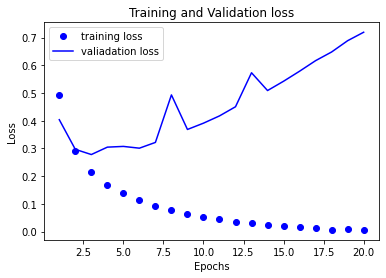

In [34]:
import matplotlib.pyplot as plt
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(train_loss)+1)

plt.plot(epochs,train_loss,'bo',label = 'training loss')
plt.plot(epochs,val_loss,'b',label = 'valiadation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation loss')
plt.legend()
plt.show()




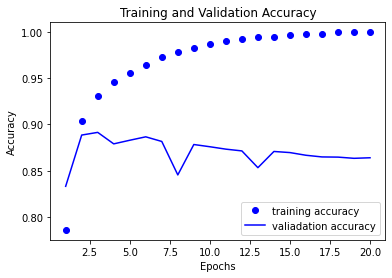

In [35]:
plt.clf()
train_accuracy = history_dict['accuracy']
val_acc = history_dict['val_accuracy']


plt.plot(epochs,train_accuracy,'bo',label = 'training accuracy')
plt.plot(epochs,val_acc,'b',label = 'valiadation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [36]:
model.fit(x_partial_train,y_partial_train,epochs=4,batch_size =512,validation_data = (x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 346us/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.7630 - val_accuracy: 0.8622
Epoch 2/4
15000/15000 [==============================] - 1s 97us/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.7899 - val_accuracy: 0.8609
Epoch 3/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.8341 - val_accuracy: 0.8603
Epoch 4/4
15000/15000 [==============================] - 1s 98us/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.8611 - val_accuracy: 0.8604


In [38]:
### Experiments
#a ) Adding 1 more hidden layer
#b) more or less hidden units
#c) mse
#d) tanh 

